In [1]:
# data analysis and wrangling
import pandas as pd #pandas판다스
import os
import numpy as np #넘파이 - 벡터 연산을 도와준다.
import random as rand
import warnings
warnings.filterwarnings('ignore')

# visualization

import matplotlib.pyplot as plt #matplotlib 매트 플롯 라이브러리 - 데이터 시각화에 이용
import seaborn as sns #시본 - 데이터 시각화에 이용.
%matplotlib inline

# machine learning

from pandas import Series

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Acquire Data

In [2]:
train_df = pd.read_csv("./Data/train.txt", delimiter='\t', header=0)
test_df = pd.read_csv("./Data/test.txt", delimiter='\t', header=0)

combine = [train_df, test_df]

sample_submission = pd.read_csv("./Data/gender_submission.txt", delimiter='\t', header=0)

In [3]:
train_df.shape, test_df.shape, sample_submission.shape

((891, 12), (418, 11), (418, 2))

# Analyze by describing data

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


survival - 생존유무, target 값. (0 = 사망, 1 = 생존)  /  
pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)  /  
sex - 성별  /  
Age - 나이(세)  /  
sibsp - 함께 탑승한 형제자매, 배우자 수 총합  /  
parch - 함께 탑승한 부모, 자녀 수 총합  /  
ticket - 티켓 넘버  /  
fare - 탑승 요금  /  
cabin - 객실 넘버  /  
bembarked - 탑승 항구  /  

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Categorical 과 Numerical(Continous) 의 구분

categorical : Survived, Sex, Embarked, Pclass  /  
continous : Age, Fare, SibSp, Parch  /  
섞여있는 데이터도 구분해야 한다

In [6]:
display(train_df.head())
display(train_df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


null 값과 empty value 에 대한 처리도 이루어져야 한다.

In [7]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()
#count의 수가 다르다 -> 결측치가 있다는 의미

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_df.isnull().sum() / train_df.shape[0] #결측치의 퍼센티지 확인

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
test_df.isnull().sum() / test_df.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

### Target Label 의 분포 확인

In [12]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

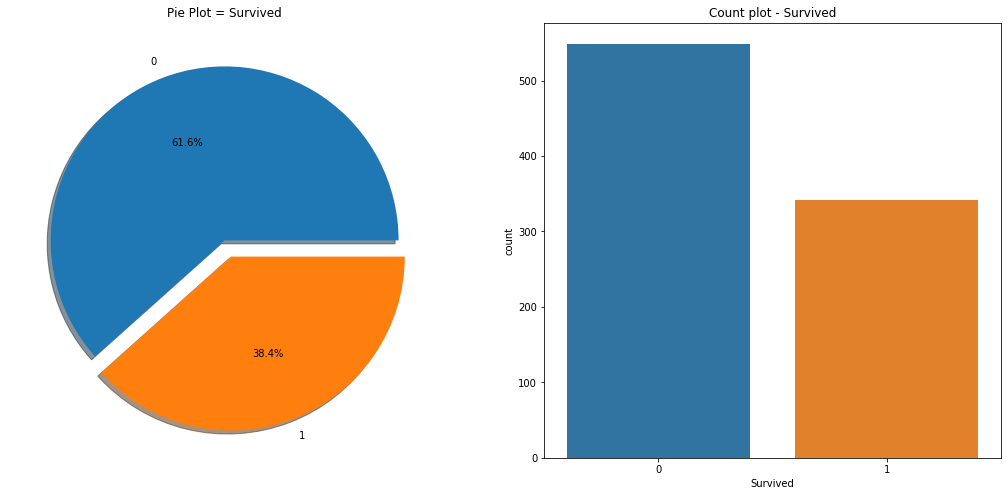

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train_df["Survived"].value_counts().plot.pie(explode = [0, 0.1],
                                            autopct = "%1.1f%%",
                                            ax = ax[0], shadow = True)

ax[0].set_title("Pie Plot = Survived")
ax[0].set_ylabel("")

sns.countplot("Survived", data = train_df, ax = ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

# 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

### Pclass에 따른 생존률 비교

In [14]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True #Pclass를 인덱스로서 사용한다.
                                        ).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(train_df["Pclass"], train_df["Survived"], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
pd.crosstab(train_df["Pclass"], train_df["Survived"], margins = False)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [18]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


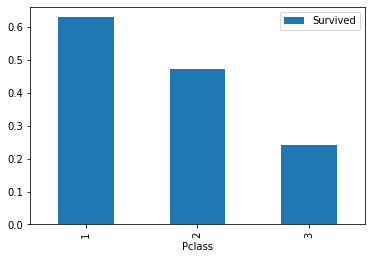

In [19]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean().plot.bar()

### 성별에 따른 생존률 비교

In [20]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = True).count()

,Survived
Sex,
female,314
male,577


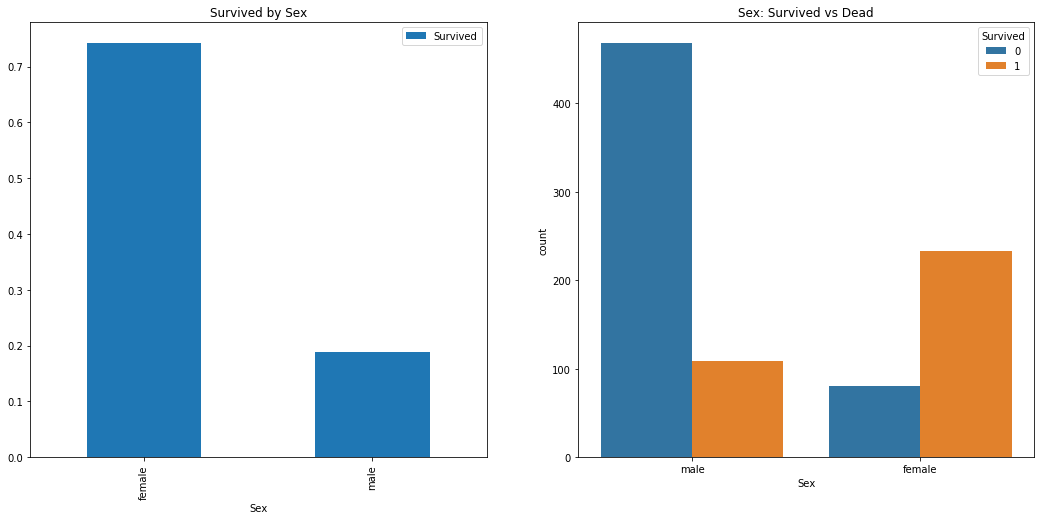

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived by Sex")

sns.countplot("Sex", hue="Survived", data = train_df, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")

plt.show()

### Pclass와 성별을 모두 고려한 생존률 비교

C:\Users\Andrew\.conda\envs\andrew_37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Andrew\.conda\envs\andrew_37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


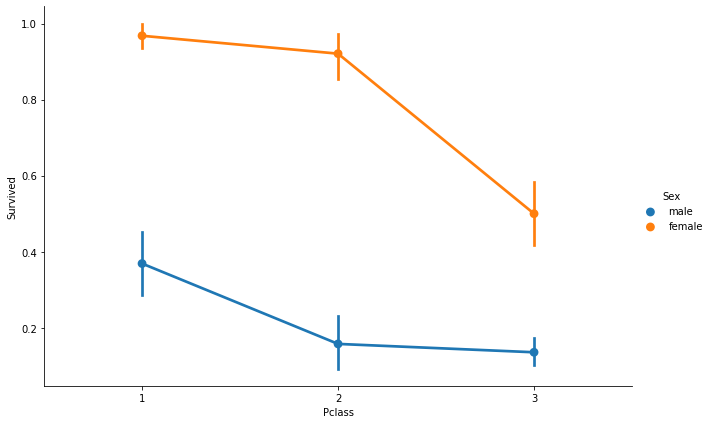

In [22]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train_df,
              size = 6, aspect = 1.5)

### 나이에 따른 생존률 비교

In [23]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(train_df["Age"].max()))
print("제일 나이 어린 탑승객 : {:.1f} Years".format(train_df["Age"].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(train_df["Age"].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


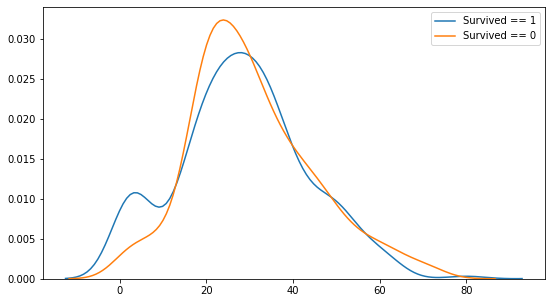

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(train_df[train_df["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train_df[train_df["Survived"] == 0]["Age"], ax = ax)

plt.legend(["Survived == 1", "Survived == 0"])
plt.show()

In [25]:
train_df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

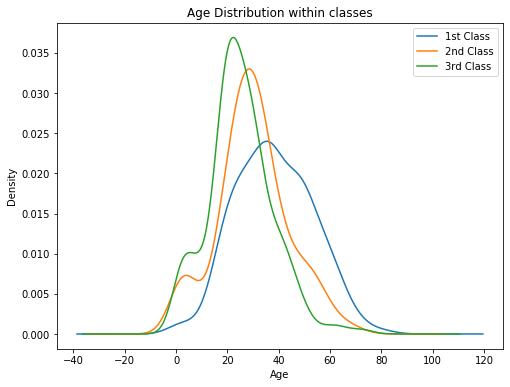

In [26]:
plt.figure(figsize = (8, 6))
train_df["Age"][train_df["Pclass"] == 1].plot(kind = "kde")
train_df["Age"][train_df["Pclass"] == 2].plot(kind = "kde")
train_df["Age"][train_df["Pclass"] == 3].plot(kind = "kde")

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

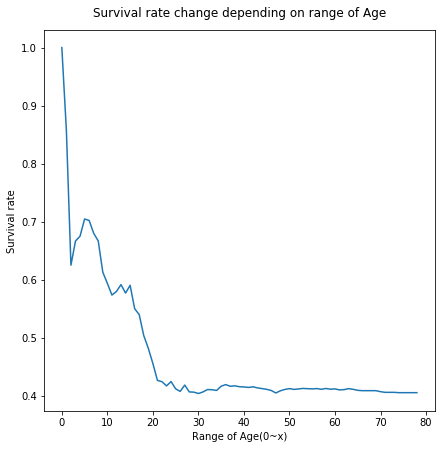

In [27]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train_df[train_df["Age"] < i]["Survived"].sum() /
                                   len(train_df[train_df["Age"] < i]["Survived"]))

plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

### 탑승 선착장에 따른 생존률 비교

In [28]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
# # sort_values

# DataFrame.sort_values(by=None, #정렬할 기준 변수
#                      axis = 0, # 0 or "index" , 1 or "columns"
#                      ascending = True, # True: 오름차순, False: 내림차순
#                      inplace = False, # DataFrame 자체를 정렬해서 저장
#                      kind = "quicksort", # 정렬 알고리즘
#                      na_position="last") # 결측값(NaN값) 위치, {"first", "last"}

In [30]:
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", 
                                                                                            ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


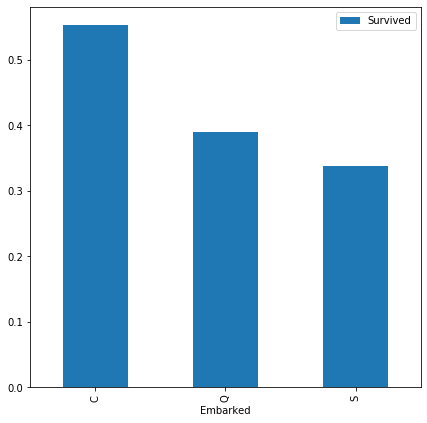

In [31]:
f, ax = plt.subplots(1, 1, figsize = (7,7))
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", 
                                                                                            ascending = False).plot.bar(ax = ax)

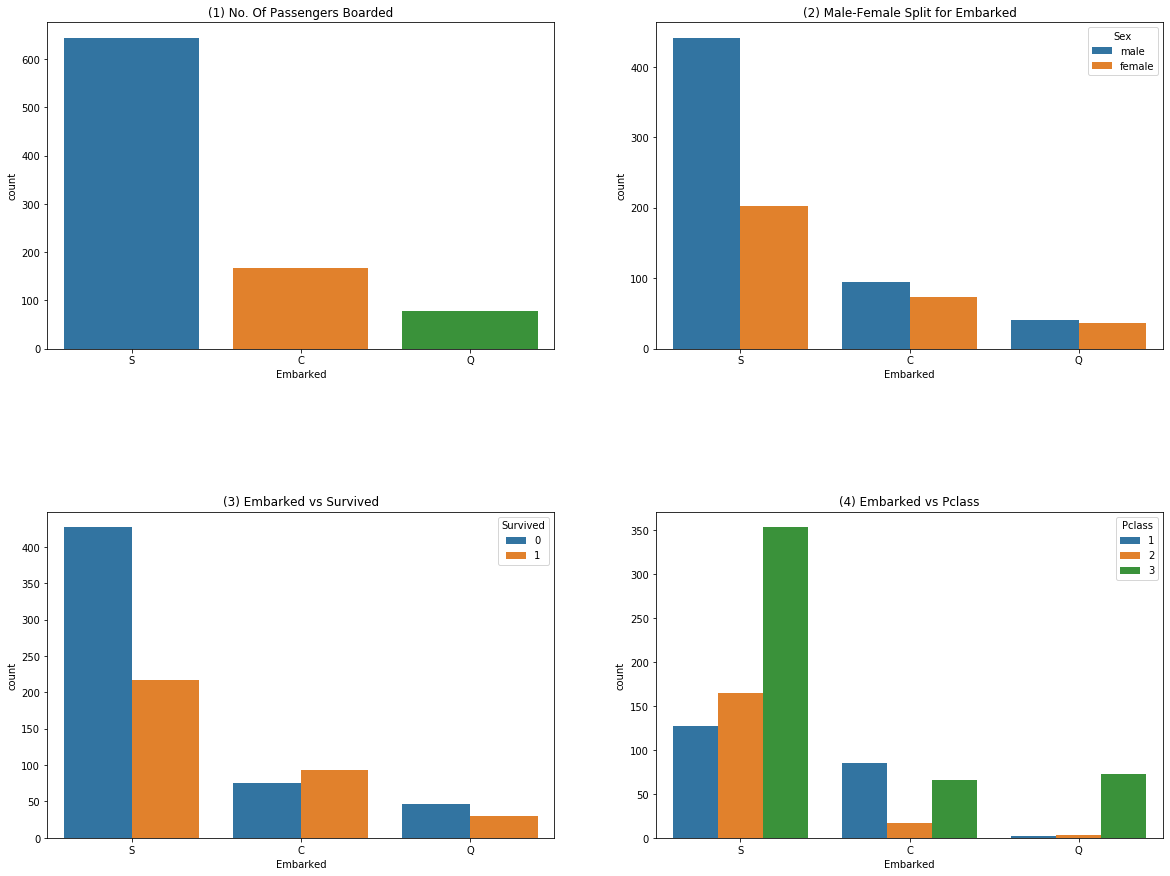

In [32]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot("Embarked", data = train_df, ax = ax[0, 0])
ax[0, 0].set_title("(1) No. Of Passengers Boarded")

sns.countplot("Embarked", hue = "Sex", data = train_df, ax = ax[0, 1])
ax[0, 1].set_title("(2) Male-Female Split for Embarked")

sns.countplot("Embarked", hue = "Survived", data = train_df, ax = ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked", hue = "Pclass", data = train_df, ax = ax[1, 1,])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### 가족 수에 따른 생존률 비교

In [33]:
# 가족구성원 수 라는 새로운 데이터 프레임 구성

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1

test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [34]:
train_df["FamilySize"].max()

11

In [35]:
train_df["FamilySize"].min()

1

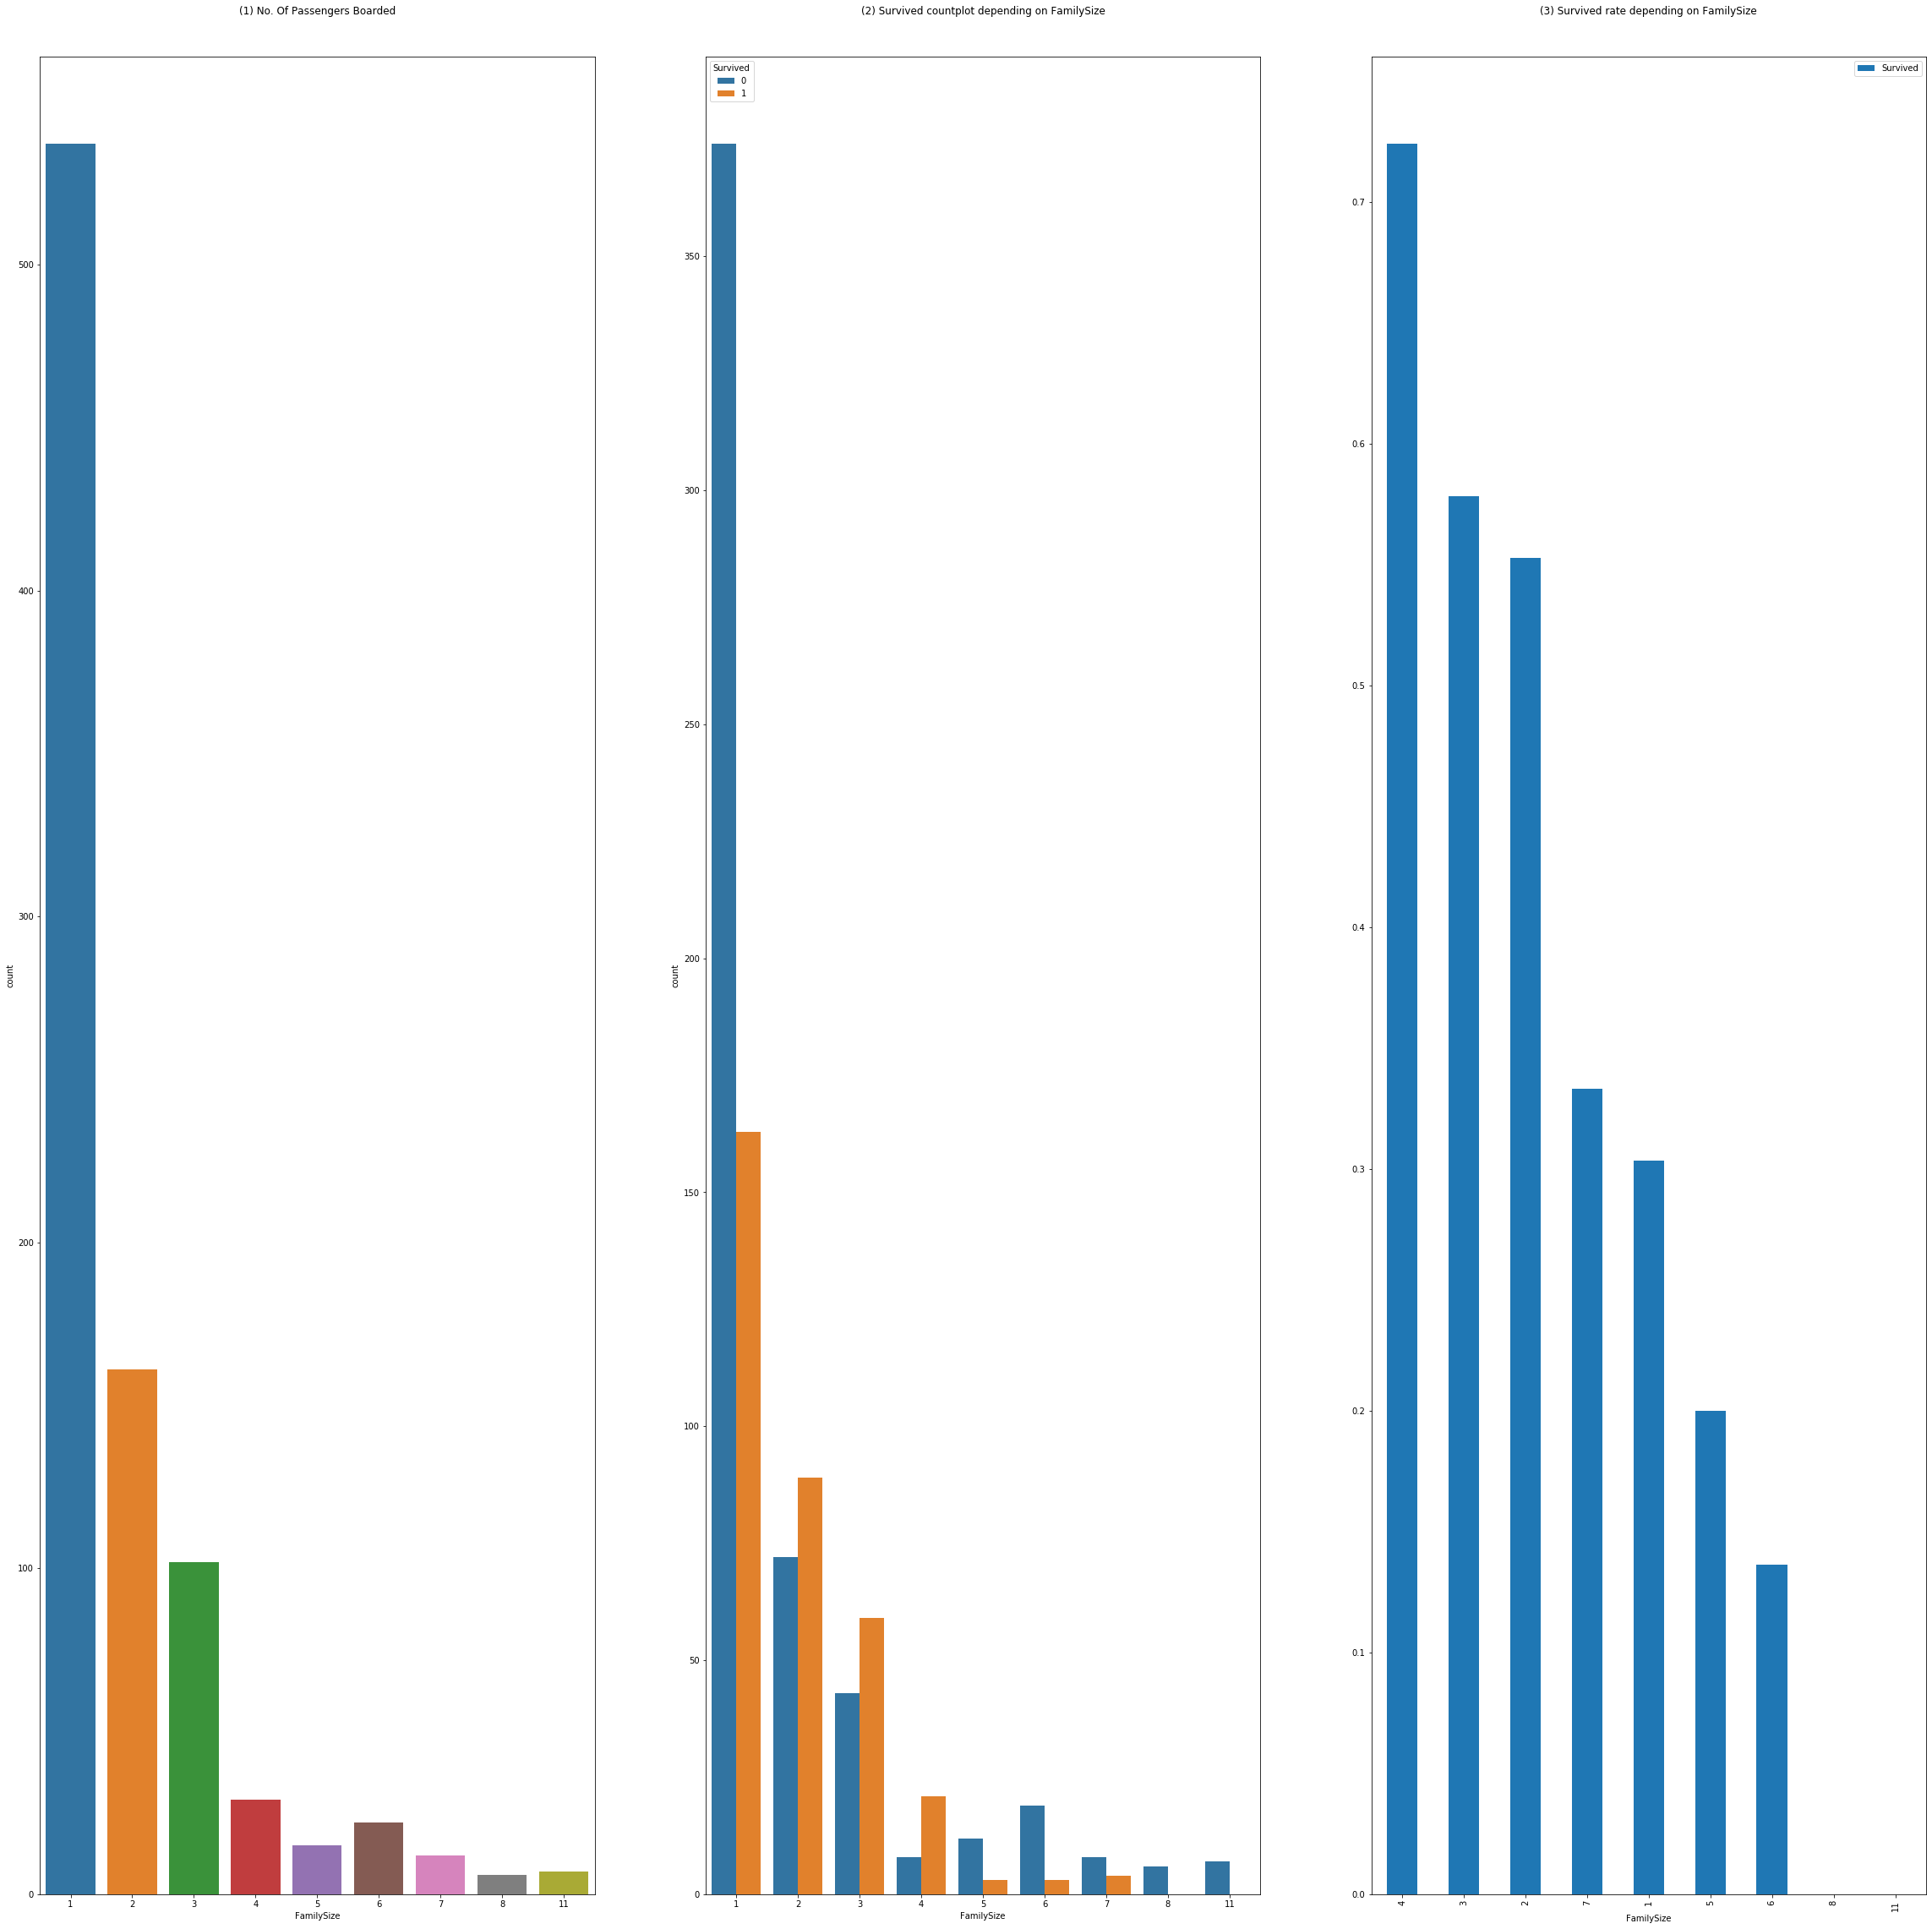

In [36]:
f, ax = plt.subplots(1, 3, figsize = (40, 40))

sns.countplot("FamilySize", data = train_df, ax = ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded", y = 1.02)

sns.countplot("FamilySize", hue = "Survived", data = train_df, ax = ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y = 1.02)

train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize", y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### 탑승 요금에 따른 생존률 비교

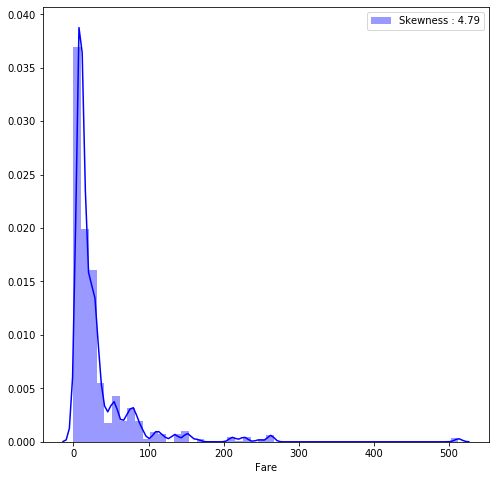

In [37]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(train_df["Fare"], color = "b", 
                 label = "Skewness : {:.2f}".format(train_df["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

In [38]:
# null 값 처리
test_df.loc[test_df.Fare.isnull(), "Fare"] = test_df["Fare"].mean()

In [39]:
train_df["Fare"] = train_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test_df["Fare"] = test_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

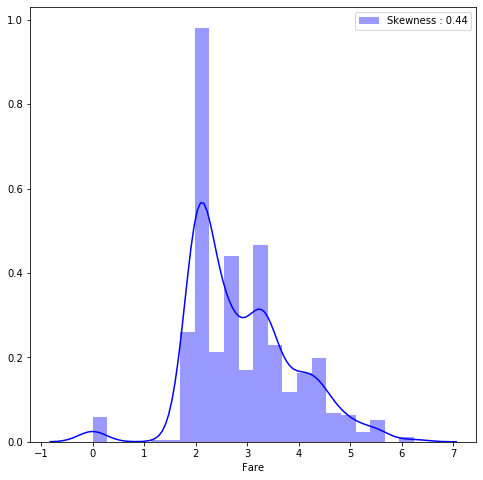

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df["Fare"], color = "b", label = "Skewness : {:.2f}".format(train_df["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

### Cabin에 따른 생존률 비교

In [41]:
train_df["Cabin"].isnull().sum() / train_df.shape[0]

#NaN 값이 약 80퍼센트 이므로, 유의미한 정보를 얻기 쉽지 않다.
#그러므로 모델에 포함시키지 않는다.

0.7710437710437711

In [42]:
train_df.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


In [43]:
train_df[["PassengerId", "Cabin"]].head()

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


### Ticket에 따른 생존률 비교

In [44]:
train_df["Ticket"].isnull().sum()

# NaN 값이 하나도 없다.
# 하지만, 데이터가 스트링형태이므로 이를 활용하기 위해선 데이터 전처리 과정이 필요하다.
# 이를 위한 아이디어를 구상하고 계획하는 것 ㅡ> Feature Engineering

0

In [45]:
train_df["Ticket"].value_counts()

347082                7
CA. 2343              7
1601                  7
CA 2144               6
3101295               6
347088                6
382652                5
S.O.C. 14879          5
113781                4
19950                 4
LINE                  4
2666                  4
W./C. 6608            4
349909                4
4133                  4
17421                 4
113760                4
PC 17757              4
347077                4
13502                 3
347742                3
PC 17582              3
PC 17760              3
C.A. 31921            3
363291                3
F.C.C. 13529          3
24160                 3
35273                 3
29106                 3
248727                3
                     ..
STON/O 2. 3101293     1
376566                1
219533                1
244361                1
STON/O2. 3101271      1
11753                 1
250643                1
349204                1
237668                1
2223                  1
4136            

# Feature Engineering

In [46]:
train_df["Age"].isnull().sum()

177

data를 string으로 바꿔주는 str method
여기에 정규표현식을 적용하게 해주는 extract method

In [47]:
train_df["Initial"] = train_df.Name.str.extract("([A-Za-z]+)\.")
test_df["Initial"] = test_df.Name.str.extract("([A-Za-z]+)\.")

In [48]:
pd.crosstab(train_df["Initial"], train_df["Sex"]).T.style.background_gradient(cmap = "summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [49]:
pd.crosstab(train_df["Initial"], train_df["Sex"])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [50]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [51]:
train_df.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


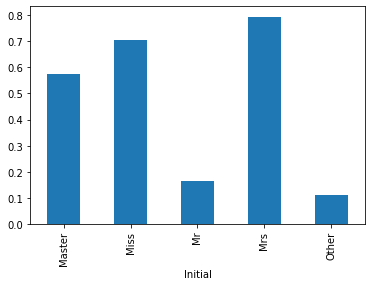

In [52]:
train_df.groupby("Initial")["Survived"].mean().plot.bar()

In [53]:
train_df.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


### 평균으로 null 값 채우기
### 이외에도 다양한 방법이 있으니 공부해봅시다

In [54]:
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == "Mr"), "Age"] = 33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == "Mrs"), "Age"] = 36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == "Master"), "Age"] = 5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == "Miss"), "Age"] = 22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == "Other"), "Age"] = 46

test_df.loc[(test_df.Age.isnull())&(test_df.Initial == "Mr"), "Age"] = 33
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == "Mrs"), "Age"] = 36
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == "Master"), "Age"] = 5
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == "Miss"), "Age"] = 22
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == "Other"), "Age"] = 46

In [55]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [56]:
train_df.isnull().sum().loc[train_df.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [57]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Cabin    327
dtype: int64

In [58]:
train_df["Embarked"].isnull().sum()

2

In [59]:
train_df["Embarked"].fillna("S", inplace = True)

In [60]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Cabin    687
dtype: int64

### continuous 데이터를 categorical 하기

In [61]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
train_df["Age_category"] = train_df["Age"].apply(category_age)
test_df["Age_category"] = test_df["Age"].apply(category_age)

In [62]:
train_df.groupby(["Age_category"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
Age_category,,,,,,,,,,,,,,
0,66,66,66,66,66,66,66,66,66,66,10,66,66,66
1,102,102,102,102,102,102,102,102,102,102,19,102,102,102
2,256,256,256,256,256,256,256,256,256,256,38,256,256,256
3,304,304,304,304,304,304,304,304,304,304,67,304,304,304
4,89,89,89,89,89,89,89,89,89,89,33,89,89,89
5,48,48,48,48,48,48,48,48,48,48,24,48,48,48
6,19,19,19,19,19,19,19,19,19,19,10,19,19,19
7,7,7,7,7,7,7,7,7,7,7,3,7,7,7


In [63]:
train_df.groupby(["Age_category"])["PassengerId"].count()

Age_category
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## string data를 컴퓨터가 인식할 수 있도록 numerical로 바꿔줌

In [64]:
train_df["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [65]:
test_df["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [66]:
train_df["Initial"] = train_df["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4})
test_df["Initial"] = test_df["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4})

In [67]:
train_df["Embarked"] = train_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
test_df["Embarked"] = test_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [68]:
train_df["Embarked"].isnull().any(), train_df["Embarked"].dtypes

(False, dtype('int64'))

In [69]:
train_df["Sex"] = train_df["Sex"].map({"female": 0, "male": 1})
test_df["Sex"] = test_df["Sex"].map({"female": 0, "male": 1})

In [70]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
FamilySize        int64
Initial           int64
Age_category      int64
dtype: object

In [71]:
test_df.dtypes

PassengerId       int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
FamilySize        int64
Initial           int64
Age_category      int64
dtype: object

# 시각화를 통해 데이터 간의 관계를 확인해보자

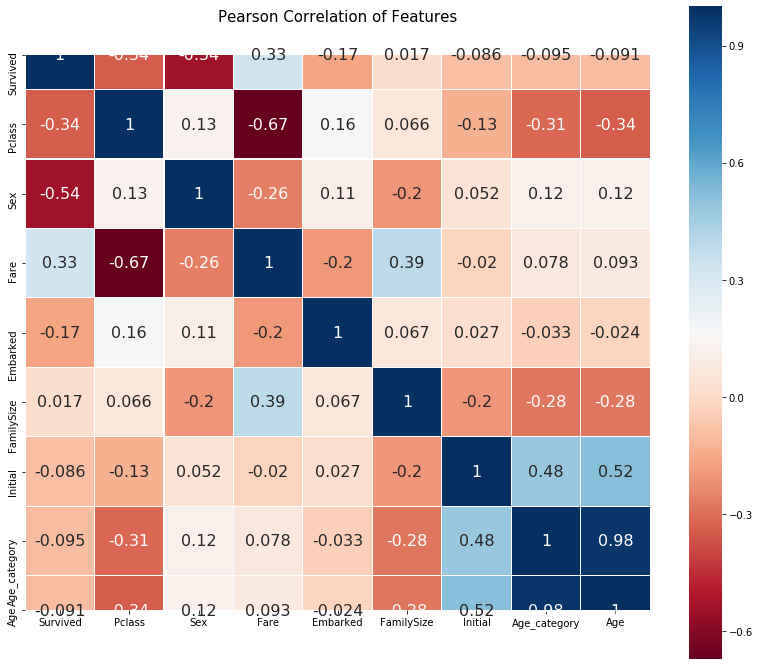

In [72]:
heatmap_data = train_df[["Survived", "Pclass", "Sex", "Fare", "Embarked", "FamilySize", "Initial", "Age_category", "Age"]]

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size":16})

del heatmap_data

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,2,3


In [74]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_category
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,1,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,2,3,4
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,1,2,6
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,2,1,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,2,3,3,2


### one - hot encoding
(1,2) 와 (1,5)가 동일한 가치를 가지도록

In [75]:
train_df = pd.get_dummies(train_df, columns = ["Initial"], prefix = "Initial")
test_df = pd.get_dummies(test_df, columns = ["Initial"], prefix = "Initial")

In [76]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"], prefix = "Embarked")
test_df = pd.get_dummies(test_df, columns = ["Embarked"], prefix = "Embarked")

### Drop columns

In [77]:
train_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis = 1, inplace = True)
test_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis = 1, inplace = True)

In [78]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_category,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [79]:
train_df.dtypes

Survived          int64
Pclass            int64
Sex               int64
Age             float64
Fare            float64
FamilySize        int64
Age_category      int64
Initial_0         uint8
Initial_1         uint8
Initial_2         uint8
Initial_3         uint8
Initial_4         uint8
Embarked_0        uint8
Embarked_1        uint8
Embarked_2        uint8
dtype: object

In [80]:
test_df.dtypes

Pclass            int64
Sex               int64
Age             float64
Fare            float64
FamilySize        int64
Age_category      int64
Initial_0         uint8
Initial_1         uint8
Initial_2         uint8
Initial_3         uint8
Initial_4         uint8
Embarked_0        uint8
Embarked_1        uint8
Embarked_2        uint8
dtype: object

# 모델 개발 및 학습

## Titanic Problem은 생존 / 사망(1 / 0)의 target class를 가지므로 이진분류 문제(Binary Classfication)

그렇다면, 선형회귀를 사용하나??? 시그모이드를 사용하나???

In [81]:
X_train = train_df.drop("Survived", axis = 1).values
target_label = train_df["Survived"].values
X_test = test_df.values

In [82]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

In [83]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2018)

In [84]:
y_tr.shape, y_vld.shape

((712,), (179,))

In [85]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize',
       'Age_category', 'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3',
       'Initial_4', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [86]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [87]:
print("총 {}명 중 {:.2f}% 정확도로 생존을 맞춤".format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 179명 중 78.21% 정확도로 생존을 맞춤


각 특징들 중 어떤 것의 가중치가 높은지를 확인한다.

In [88]:
feature_importance = model.feature_importances_
print(feature_importance)
Series_feat_imp = Series(feature_importance, index = test_df.columns)

[0.08238066 0.12483612 0.19343599 0.27046584 0.08913257 0.05872762
 0.00412823 0.01037547 0.1241408  0.00543582 0.0054474  0.0108161
 0.00532608 0.0153513 ]


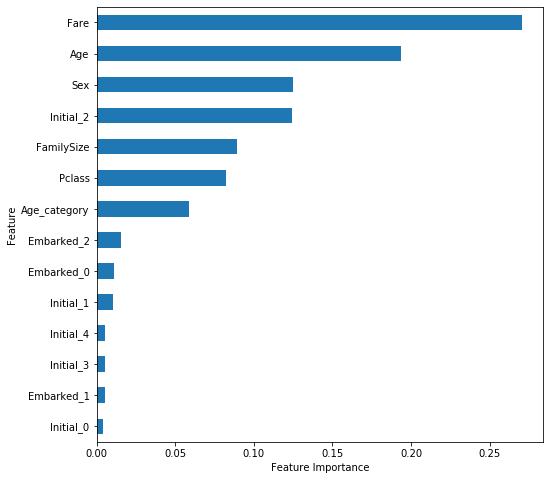

In [89]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## keras를 사용한 NN 모델

In [90]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [91]:
nn_model = Sequential()
nn_model.add(Dense(32, activation = "relu", input_shape = (14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation = "relu"))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation = "relu"))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation = "sigmoid"))

Loss = "binary_crossentropy"
nn_model.compile(loss = Loss, optimizer = Adam(), metrics = ["accuracy"])
nn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)  

In [92]:
history = nn_model.fit(X_tr, y_tr, batch_size = 64, epochs = 500, validation_data = (X_vld, y_vld), verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 712 samples, validate on 179 samples
Epoch 1/500
712/712 [==============================] - 2s 2ms/step - loss: 0.8964 - acc: 0.5562 - val_loss: 0.6358 - val_acc: 0.6313
Epoch 2/500
712/712 [==============================] - 0s 69us/step - loss: 0.7987 - acc: 0.5885 - val_loss: 0.6595 - val_acc: 0.6592
Epoch 3/500
712/712 [==============================] - 0s 66us/step - loss: 0.7377 - acc: 0.5576 - val_loss: 0.6893 - val_acc: 0.5866
Epoch 4/500
712/712 [==============================] - 0s 63us/step - loss: 0.7148 - acc: 0.5702 - val_loss: 0.6540 - val_acc: 0.6369
Epoch 5/500
712/712 [==============================] - 0s 63us/step - loss: 0.7017 - acc: 0.5772 - val_loss: 0.6580 - val_acc: 0.6369
Epoch 6/500
712/712 [==============================] - 0s 81us/step - loss: 0.7080 - acc: 0.5857 - val_loss: 0.6539 - val_acc: 0.6369
Epoch 7/500
712/712 [==============================] - 0s 65us/step - loss: 0.6796 - acc: 0.5801 - val_

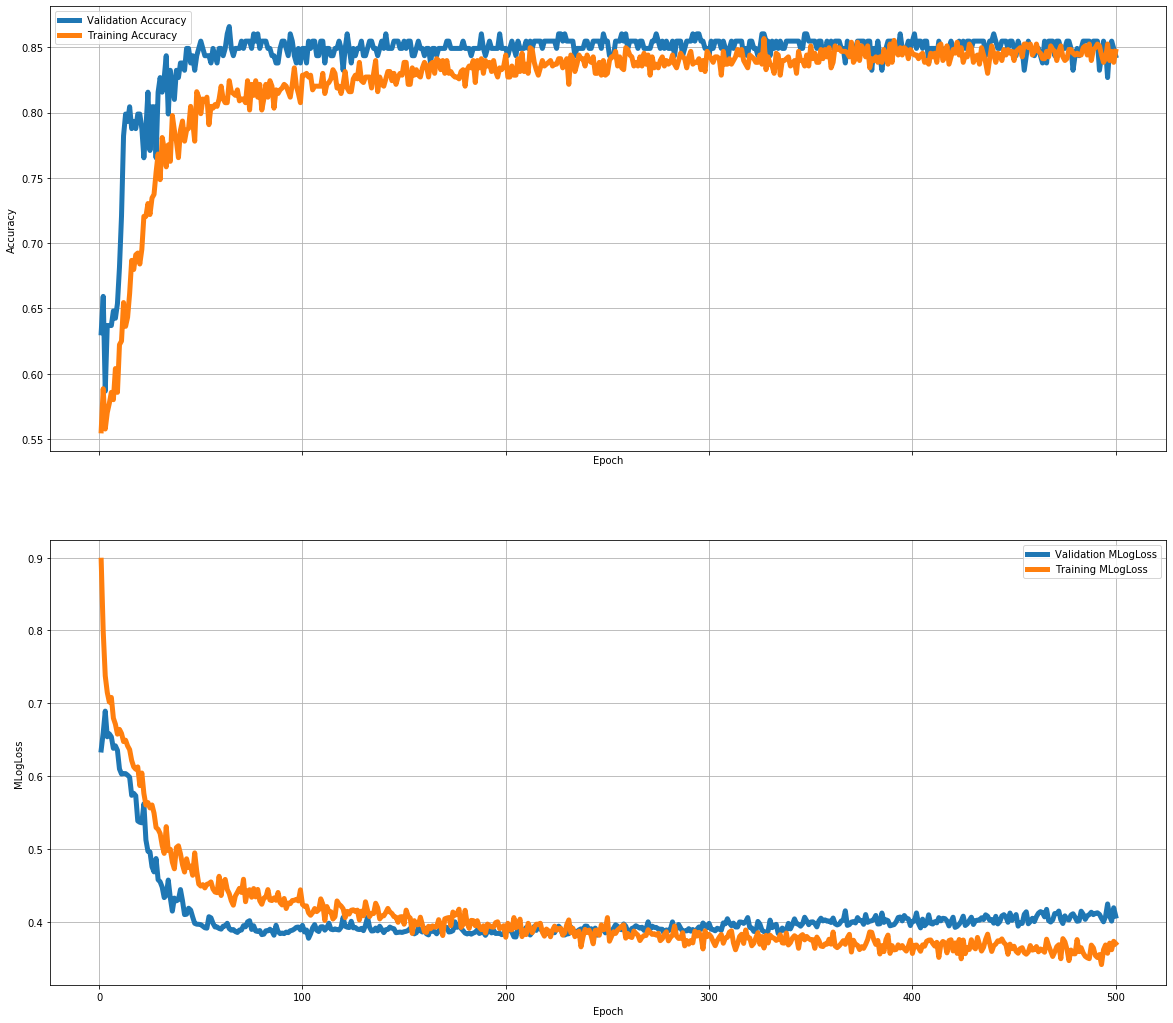

In [94]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort = True)
hist_df.index = np.arange(1, len(hist_df) + 1)

fig, axs = plt.subplots(nrows = 2, sharex = True, figsize = (20, 18))
axs[0].plot(hist_df.val_acc, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.acc, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();